In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Chuyển đến vị trí thư mục hiện tại
%cd /content/drive/MyDrive/Colab/chapter6_solution/Bai 6 - Code

/content/drive/.shortcut-targets-by-id/1xiv3cJ70E8QNV0XL9gs6EDLjOnszeQ0O/Bai 6 - Code


In [ ]:
!ls

'Chapter 6.ipynb'		       spam.csv
 DL_Model.ipynb			       weights-improvement-01-7.9131.hdf5
 dts_20k_preprocessed.csv	       weights-improvement-02-7.1496.hdf5
 dts_20k_raw.csv		       weights-improvement-03-7.0137.hdf5
 GoogleNews-vectors-negative300.bin    weights-improvement-04-6.9062.hdf5
 NaiveBayesClassifier.ipynb	       weights-improvement-05-6.8229.hdf5
 Preprocessing_and_Visualizing.ipynb


## Constants

In [ ]:
EPOCHS = 10
BATCH_SIZE = 64

### Import libraries

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk import *
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import Word2Vec
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re
stopword_list = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
!pip install --upgrade --force-reinstall numpy
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 93.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 54.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5


In [ ]:
!pip install keras-preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.18.0'

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
spam_csv = '/content/drive/MyDrive/Colab/chapter6_solution/Bai 6 - Code/spam.csv'

In [ ]:
spam_df = pd.read_csv(spam_csv, encoding = "ISO-8859-1")

In [ ]:
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#check sample content in the email
spam_df['v2'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
# Remove stop words
stop = stopwords.words('english')
spam_df['v2'] = spam_df['v2'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
spam_df['v2'][0]

'Go jurong point, crazy.. Available bugis n great world la e buffet... Cine got amore wat...'

In [ ]:
# Delete unwanted columns
Email_Data = spam_df[['v1', 'v2']]

In [ ]:
# Rename column names
Email_Data = Email_Data.rename(columns={"v1":"Target", "v2":"Email"})
Email_Data.head(10)

,Target,Email
0,ham,"Go jurong point, crazy.. Available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor... U c already say...
4,ham,"Nah I think goes usf, lives around though"
5,spam,FreeMsg Hey darling 3 week's word back! I'd li...
6,ham,Even brother like speak me. They treat like ai...
7,ham,As per request 'Melle Melle (Oru Minnaminungin...
8,spam,WINNER!! As valued network customer selected r...
9,spam,Had mobile 11 months more? U R entitled Update...


In [ ]:
# Delete punctuations, convert text in lower case and delete the double space
Email_Data['Email'] = Email_Data['Email'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))
Email_Data['Email'] = Email_Data['Email'].apply(lambda x: re.sub(' ', ' ', x))
Email_Data['Email'].head(10)

,Email
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni
2,free entry 2 wkly comp win fa cup final tkts 2...
3,u dun say early hor u c already say
4,nah i think goes usf lives around though
5,freemsg hey darling 3 week's word back i'd lik...
6,even brother like speak me they treat like aid...
7,as per request 'melle melle (oru minnaminungin...
8,winner as valued network customer selected rec...
9,had mobile 11 months more u r entitled update ...


In [ ]:
# Replace NaN value in the email column by _na_
list_sentences_rawdata = Email_Data["Email"].fillna("_na_").values

In [ ]:
list_sentences_rawdata

array(['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
       'ok lar joking wif u oni',
       "free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question(std txt ratetc's apply 08452810075over18's",
       ..., 'pity * mood that soany suggestions',
       'the guy bitching i acted like interested buying something else next week gave us free',
       'rofl its true name'], dtype=object)

In [ ]:
list_classes = ["Target"]
target = Email_Data[list_classes].values

In [ ]:
target[:5]

array([['ham'],
       ['ham'],
       ['spam'],
       ['ham'],
       ['ham']], dtype=object)

In [ ]:
processed_df = Email_Data[['Email', 'Target']]
processed_df

,Email,Target
0,go jurong point crazy available bugis n great ...,ham
1,ok lar joking wif u oni,ham
2,free entry 2 wkly comp win fa cup final tkts 2...,spam
3,u dun say early hor u c already say,ham
4,nah i think goes usf lives around though,ham
...,...,...
5567,this 2nd time tried 2 contact u u å£750 pound ...,spam
5568,will ì_ b going esplanade fr home,ham
5569,pity * mood that soany suggestions,ham
5570,the guy bitching i acted like interested buyin...,ham


### Split data

In [ ]:
# Chia dữ liệu tỷ lệ 80:20
train, test = train_test_split(processed_df, test_size=0.2)

In [ ]:
# Xác định độ dài tối đa của một câu, dài bỏ bớt, ngắn thêm 0
MAX_SEQUENCE_LENGTH = 300

# Xác định số lượng từ phổ biến trên toàn tập dữ liệu
MAX_NB_WORDS = 20000

# Khởi tạo một tokenizer và dùng dữ liệu train để xây dựng từ điển từ vựng.
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train['Email'])

# Chuyển đổi các chuỗi văn bản thành chuỗi số
train_sequences = tokenizer.texts_to_sequences(train['Email'])
test_sequences = tokenizer.texts_to_sequences(test['Email'])

# Đánh chỉ mục từ
word_index = tokenizer.word_index

In [ ]:
# In ra số lượng từ vựng duy nhất trong tập dữ liệu huấn luyện.
print('Số lượng từ %s ' % len(word_index))

Số lượng từ 8443 


In [ ]:
# Sử dụng pad_sequences để cắt hoặc thêm giá trị 0
train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Số lượng câu và độ dài câu của  train_data và test_data
print(train_data.shape)
print(test_data.shape)

(4457, 300)
(1115, 300)


In [ ]:
train_labels = train['Target']
test_labels = test['Target']

In [ ]:
#import library
from sklearn.preprocessing import LabelEncoder

# converts the character array to numeric array. Assigns levels to unique labels.
label_encoder = LabelEncoder()
label_encoder.fit(train_labels)
train_labels = label_encoder.transform(train_labels)
test_labels = label_encoder.transform(test_labels)

In [ ]:
print(label_encoder.classes_)
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

['ham' 'spam']
(array([0, 1]), array([3873,  584]))
(array([0, 1]), array([952, 163]))


In [ ]:
# changing data types to one-hot vector
labels_train = to_categorical(np.asarray(train_labels))
labels_test = to_categorical(np.asarray(test_labels))
print('Shape of data tensor:', train_data.shape)
print('Shape of label tensor:', labels_train.shape)
print('Shape of label tensor:', labels_test.shape)

EMBEDDING_DIM = 100
print(MAX_SEQUENCE_LENGTH)

Shape of data tensor: (4457, 300)
Shape of label tensor: (4457, 2)
Shape of label tensor: (1115, 2)
300


In [ ]:
labels_train[0], labels_test[0]

(array([1., 0.]), array([1., 0.]))

In [ ]:
import sys, os, re, csv, codecs, numpy as np
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential

In [ ]:
def show_history(history):
  # Vẽ biểu đồ loss và accuracy
  plt.figure(figsize=(12, 5))

  # Accuracy
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  # Loss
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.tight_layout()
  plt.show()

### Thử nghiệm với mô hình CNN

In [ ]:
print('Training CNN 1D model.')

cnn_model = Sequential()
cnn_model.add(Embedding(MAX_NB_WORDS,EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH))
cnn_model.add(Dropout(0.5))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(MaxPooling1D(5))
cnn_model.add(Dropout(0.5))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(MaxPooling1D(5))
cnn_model.add(Dropout(0.5))
cnn_model.add(BatchNormalization())
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(2, activation='softmax'))

Training CNN 1D model.


In [ ]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

cnn_history = cnn_model.fit(train_data, labels_train,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(test_data, labels_test))

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 279ms/step - accuracy: 0.8302 - loss: 0.4220 - val_accuracy: 0.8538 - val_loss: 0.5885
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 295ms/step - accuracy: 0.9480 - loss: 0.1563 - val_accuracy: 0.8538 - val_loss: 0.4639
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 43s 324ms/step - accuracy: 0.9736 - loss: 0.0939 - val_accuracy: 0.8538 - val_loss: 0.3757
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 39s 300ms/step - accuracy: 0.9859 - loss: 0.0548 - val_accuracy: 0.8547 - val_loss: 0.4597
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 273ms/step - accuracy: 0.9903 - loss: 0.0375 - val_accuracy: 0.9013 - val_loss: 0.5970
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 23s 306ms/step - accuracy: 0.9924 - loss: 0.0281 - val_accuracy: 0.9417 - val_loss: 0.6001
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 40s 294ms/step - accuracy: 0.9963 - loss: 0.0150 - val_accuracy: 0.9668 - val_loss: 0.5374
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 294ms/step - accuracy: 0.9957 - loss: 0.0213 - val_accu

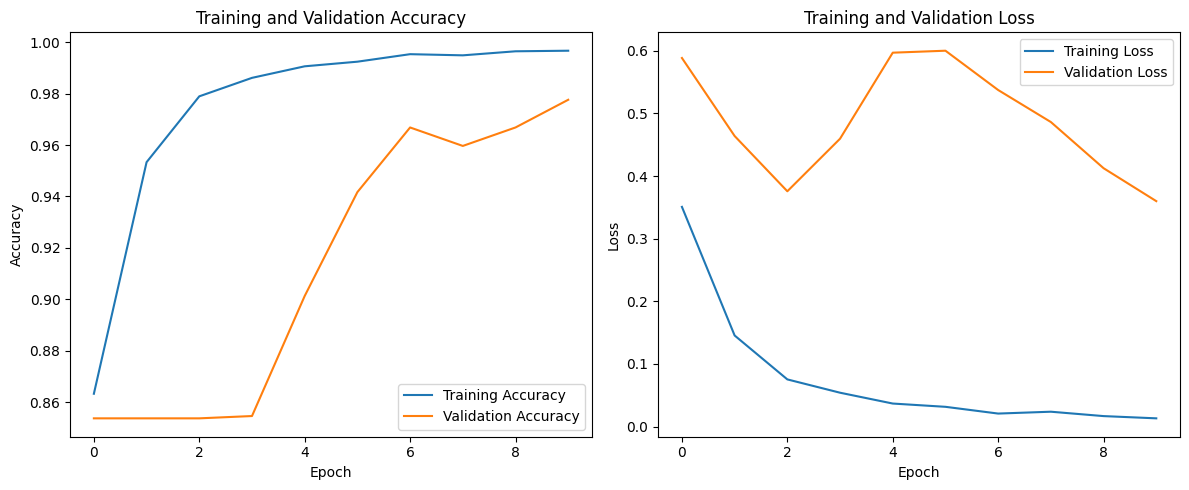

In [ ]:
show_history(cnn_history)

In [ ]:
#predictions on test data
predicted = cnn_model.predict(test_data)
predicted

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


array([[0.5477167 , 0.45228323],
       [0.54212976, 0.4578703 ],
       [0.56795037, 0.43204957],
       ...,
       [0.5419351 , 0.45806485],
       [0.00136661, 0.9986333 ],
       [0.55310464, 0.44689533]], dtype=float32)

In [ ]:
#model evaluation
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(labels_test, predicted.round())

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

print("############################")

print(sklearn.metrics.classification_report(labels_test, predicted.round()))

precision: [0.98343685 0.98657718]
recall: [0.99789916 0.90184049]
fscore: [0.99061522 0.94230769]
support: [952 163]
############################
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       952
           1       0.99      0.90      0.94       163

   micro avg       0.98      0.98      0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115
 samples avg       0.98      0.98      0.98      1115



### 2. RNN

In [ ]:
print('Training SIMPLERNN model.')

rnn_model = Sequential()
rnn_model.add(Embedding(MAX_NB_WORDS,EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH))
rnn_model.add(SimpleRNN(2, input_shape=(None,1)))

rnn_model.add(Dense(2,activation='softmax'))
rnn_model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

Training SIMPLERNN model.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
rnn_history = rnn_model.fit(train_data, labels_train,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(test_data, labels_test))

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 138ms/step - accuracy: 0.7925 - loss: 0.6694 - val_accuracy: 0.9327 - val_loss: 0.6060
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - accuracy: 0.9700 - loss: 0.5529 - val_accuracy: 0.9408 - val_loss: 0.5201
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - accuracy: 0.9879 - loss: 0.4433 - val_accuracy: 0.9426 - val_loss: 0.4496
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 147ms/step - accuracy: 0.9908 - loss: 0.3606 - val_accuracy: 0.9453 - val_loss: 0.3962
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - accuracy: 0.9911 - loss: 0.2978 - val_accuracy: 0.9480 - val_loss: 0.3554
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.9938 - loss: 0.2565 - val_accuracy: 0.9498 - val_loss: 0.3235
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.9955 - loss: 0.2201 - val_accuracy: 0.9480 - val_loss: 0.2997
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.9975 - loss: 0.1919 - val_accura

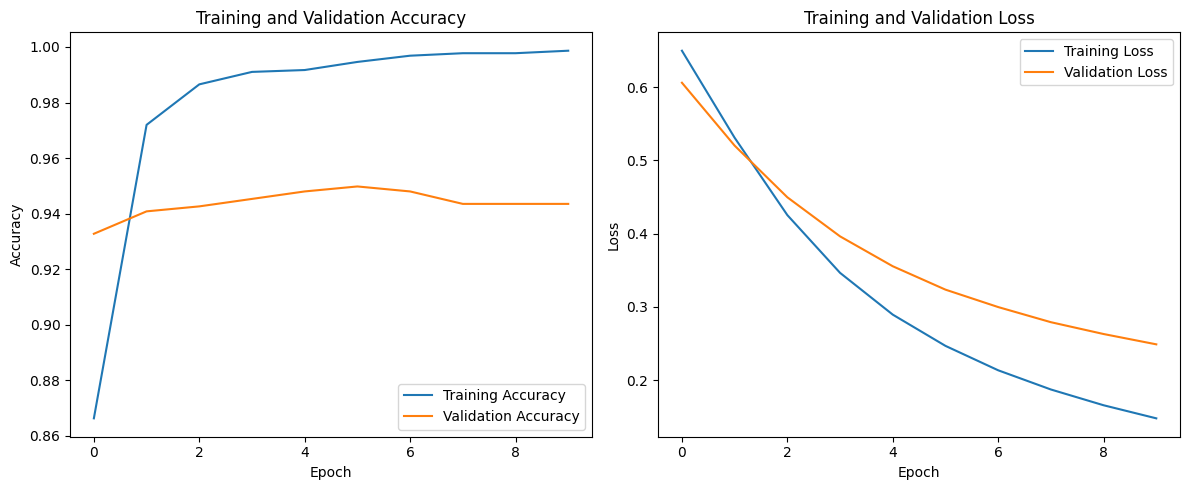

In [ ]:
show_history(rnn_history)

In [ ]:
# prediction on test data
predicted_Srnn=rnn_model.predict(test_data)
predicted_Srnn

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


array([[0.98559153, 0.01440846],
       [0.9779441 , 0.02205584],
       [0.97962993, 0.0203701 ],
       ...,
       [0.9653949 , 0.03460511],
       [0.08743746, 0.91256255],
       [0.9870744 , 0.01292567]], dtype=float32)

In [ ]:
#model evaluation
precision, recall, fscore, support = score(labels_test, predicted_Srnn.round())

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

print("############################")

print(sklearn.metrics.classification_report(labels_test, predicted_Srnn.round()))

precision: [0.94673367 0.91666667]
recall: [0.9894958  0.67484663]
fscore: [0.96764253 0.77738516]
support: [952 163]
############################
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       952
           1       0.92      0.67      0.78       163

   micro avg       0.94      0.94      0.94      1115
   macro avg       0.93      0.83      0.87      1115
weighted avg       0.94      0.94      0.94      1115
 samples avg       0.94      0.94      0.94      1115



### 3. LSTM model

In [ ]:
print('Training LSTM model.')
lstm_model = Sequential()
lstm_model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
lstm_model.add(LSTM(units=16, activation='relu', recurrent_activation='hard_sigmoid', return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(BatchNormalization())

lstm_model.add(Flatten())

lstm_model.add(Dense(2, activation='softmax'))

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Training LSTM model.


In [ ]:
lstm_history = lstm_model.fit(train_data, labels_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(test_data, labels_test))

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 28s 309ms/step - accuracy: 0.8044 - loss: 0.4379 - val_accuracy: 0.8538 - val_loss: 0.4177
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 33s 188ms/step - accuracy: 0.9833 - loss: 0.0558 - val_accuracy: 0.9202 - val_loss: 0.3645
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - accuracy: 0.9975 - loss: 0.0127 - val_accuracy: 0.9327 - val_loss: 0.2524
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 212ms/step - accuracy: 0.9997 - loss: 0.0035 - val_accuracy: 0.9632 - val_loss: 0.1779
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.9996 - loss: 0.0025 - val_accuracy: 0.9641 - val_loss: 0.1173
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 212ms/step - accuracy: 1.0000 - loss: 7.7194e-04 - val_accuracy: 0.9803 - val_loss: 0.0781
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 192ms/step - accuracy: 0.9999 - loss: 7.0048e-04 - val_accuracy: 0.9758 - val_loss: 0.0781
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 190ms/step - accuracy: 1.0000 - loss: 6.0475e-0

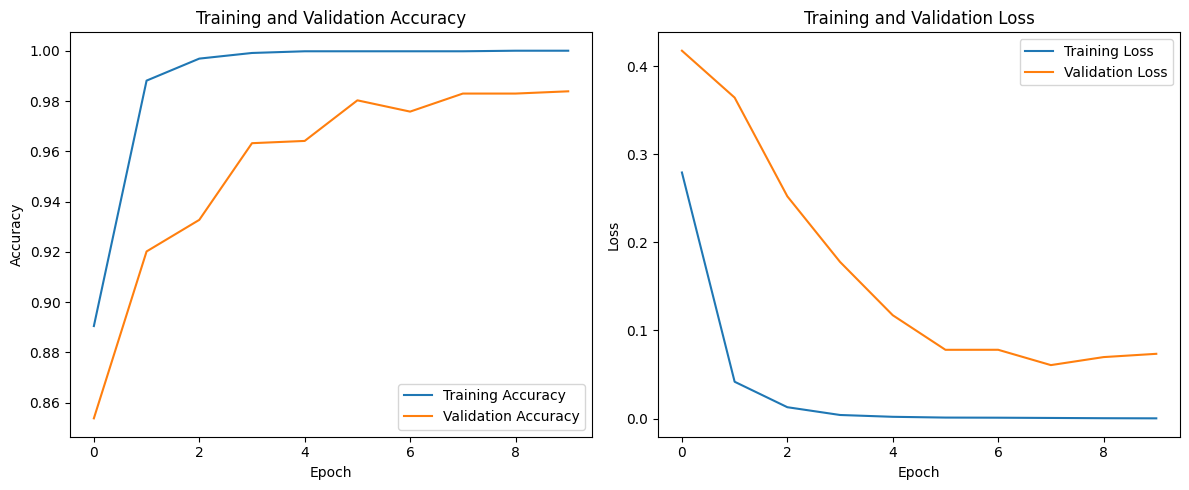

In [ ]:
show_history(lstm_history)

In [ ]:
#prediction on text data
predicted_lstm = lstm_model.predict(test_data)
predicted_lstm

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step


array([[9.9999970e-01, 1.8860599e-07],
       [9.9993318e-01, 6.6716326e-05],
       [9.9999994e-01, 1.2604698e-09],
       ...,
       [9.9995685e-01, 4.3164731e-05],
       [1.0386175e-13, 1.0000000e+00],
       [1.0000000e+00, 1.6628487e-10]], dtype=float32)

In [ ]:
#model evaluation
precision, recall, fscore, support = score(labels_test, predicted_lstm.round())

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

print("############################")

print(sklearn.metrics.classification_report(labels_test, predicted_lstm.round()))

precision: [0.9814433 1.       ]
recall: [1.         0.88957055]
fscore: [0.99063476 0.94155844]
support: [952 163]
############################
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       952
           1       1.00      0.89      0.94       163

   micro avg       0.98      0.98      0.98      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.98      0.98      0.98      1115
 samples avg       0.98      0.98      0.98      1115



### 4. Bidirectional LSTM model

In [ ]:
#model training
print('Training Bidirectional LSTM model.')

bi_lstm = Sequential()
bi_lstm.add(Embedding(MAX_NB_WORDS,EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH))
bi_lstm.add(Bidirectional(LSTM(16, return_sequences=True, dropout=0.1, recurrent_dropout=0.1)))
bi_lstm.add(Conv1D(16, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform"))
bi_lstm.add(GlobalMaxPool1D())
bi_lstm.add(Dense(50, activation="relu"))
bi_lstm.add(Dropout(0.1))
bi_lstm.add(Dense(2,activation='softmax'))

Training Bidirectional LSTM model.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
bi_lstm.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

bi_lstm_history = bi_lstm.fit(train_data, labels_train,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(test_data, labels_test))

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 53s 605ms/step - accuracy: 0.8146 - loss: 0.4687 - val_accuracy: 0.9722 - val_loss: 0.1103
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 81s 593ms/step - accuracy: 0.9812 - loss: 0.0695 - val_accuracy: 0.9865 - val_loss: 0.0574
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 83s 609ms/step - accuracy: 0.9947 - loss: 0.0199 - val_accuracy: 0.9865 - val_loss: 0.0604
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 82s 610ms/step - accuracy: 0.9987 - loss: 0.0074 - val_accuracy: 0.9865 - val_loss: 0.0511
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 82s 614ms/step - accuracy: 0.9990 - loss: 0.0037 - val_accuracy: 0.9848 - val_loss: 0.0633
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 583ms/step - accuracy: 0.9999 - loss: 7.6793e-04 - val_accuracy: 0.9857 - val_loss: 0.0656
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 577ms/step - accuracy: 1.0000 - loss: 2.8911e-04 - val_accuracy: 0.9839 - val_loss: 0.0749
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 40s 565ms/step - accuracy: 1.0000 - loss: 1.9437e-0

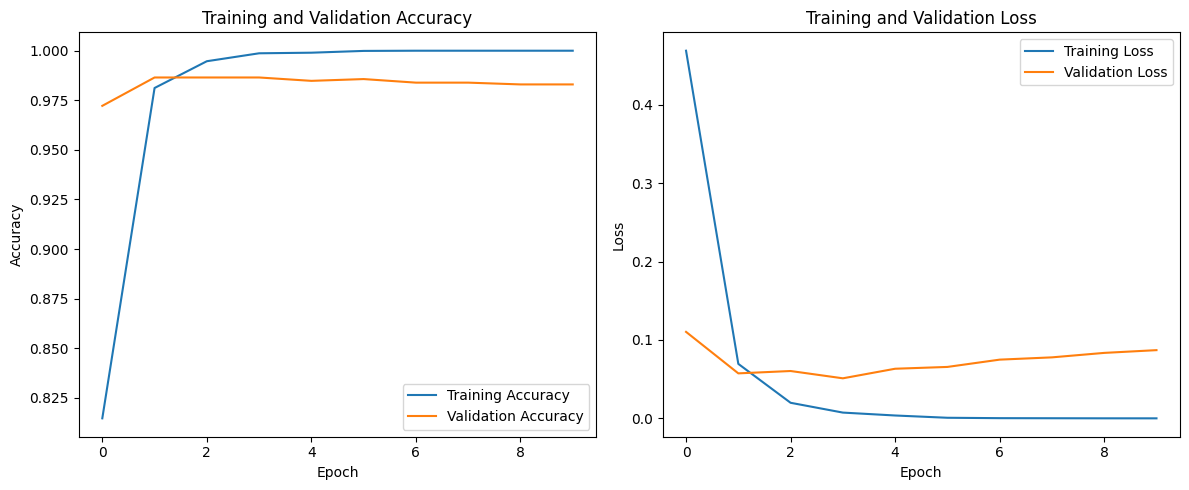

In [ ]:
show_history(bi_lstm_history)  # hàm show bạn đã có